# Figure S9. Robustness of the findings to the effect of parcellation

In [1]:
import set_env  # not included in the repo, defines $PROJECT_DIR, $PNC_PROJECT_DIR, $IMAGEN_PROJECT_DIR & $INPUT_DIR

In [2]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

OUTPUT_DIR = {
    "pnc": os.path.join(os.environ["PNC_PROJECT_DIR"], "output"),
    "imagen": os.path.join(os.environ["IMAGEN_PROJECT_DIR"], "output"),
    "micamics": os.path.join(os.environ["PROJECT_DIR"], "output", "micamics")
}
INPUT_DIR = os.environ["INPUT_DIR"]
CODE_DIR = os.path.join(os.getcwd(), "..", "scripts")
sys.path.append(CODE_DIR)
from utils import transform, plot

import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'font.size': 16, "font.family": "Asana Math", "figure.dpi": 300})
thcolor = '#44546A'
add_text = True # add statistics as text to some figures

/data/project/ei_development/env/lib/python3.10/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


Load data:

In [3]:
all_stats = {}
all_ICCs_by_age = {}
all_data = {}
all_I_E = {}
for alt in ['main', 'sch200']:
    all_stats[alt] = pd.read_csv(f"p_pnc200_{alt}_IE_age_stats.csv", index_col=0)
    all_data[alt] = pd.read_csv(f"pnc200_{alt}_data.csv", index_col=0)
    all_I_E[alt] = pd.read_csv(f"pnc200_{alt}_IE.csv", index_col=0)
    if alt != 'main':
        all_ICCs_by_age[alt] = pd.read_csv(f"p_pnc200_{alt}_IE_icc.csv", index_col=0)

## A. Effect of age on E-I ratio using Schaefer-200 parcellation

### (left) FDR-significant effects

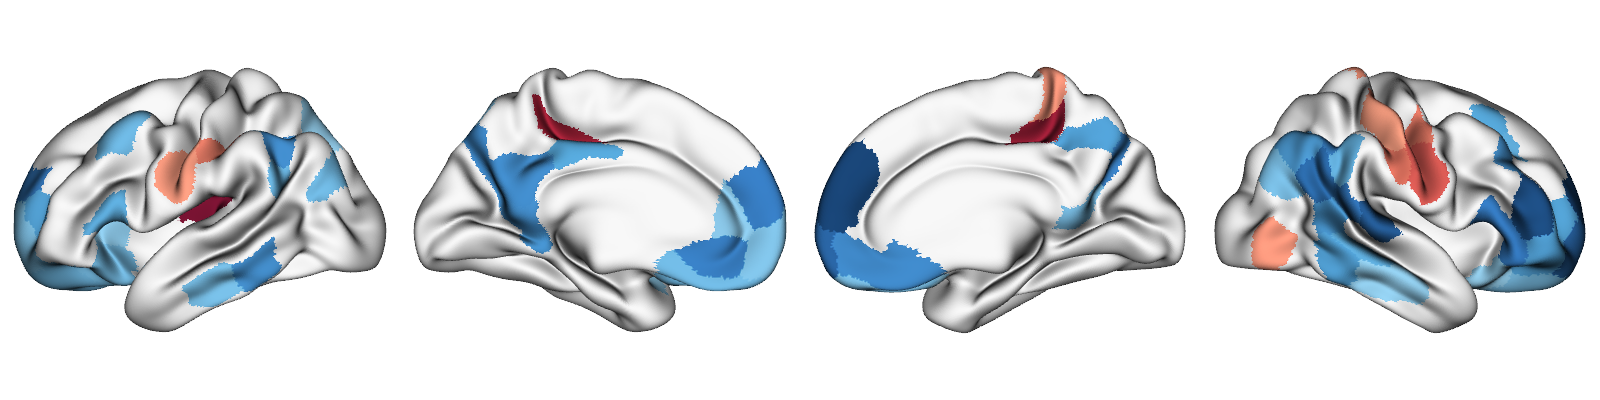

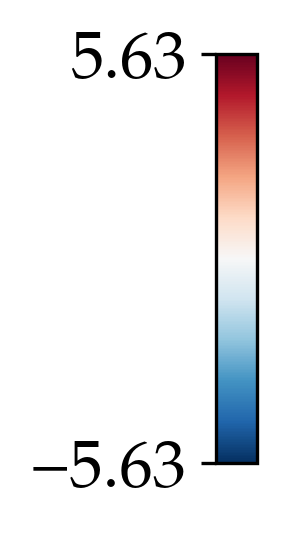

In [10]:
vmin = min(all_stats['sch200']['t'].values.min(), -all_stats['sch200']['t'].values.max()).round(2)
vmax = -vmin
plot.plot_surface(
    transform.deparcellate_surf(
        all_stats['sch200']['t'][all_stats['sch200']['p_fdr']<0.05], 
        'schaefer-200', concat=True, space='fsaverage'
    ), 
    'fsaverage', mesh_kind='semi-inflated',
    vrange=(vmin, vmax), cmap='RdBu_r', cbar=True, 
    cbar_kwargs=dict(figsize=(2,2)),
    layout_style='row',
)

### (right) Comparison with main age effect map

permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Correlation coefficient: 0.5964101029742513 ; p-vlaue: 0.0
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Cosine similarity: 0.6154152983516191 ; p-vlaue: 0.0


<Axes: xlabel='E-I ratio age effect\n(Schaefer-200)', ylabel='E-I ratio age effect\n(Schaefer-100)'>

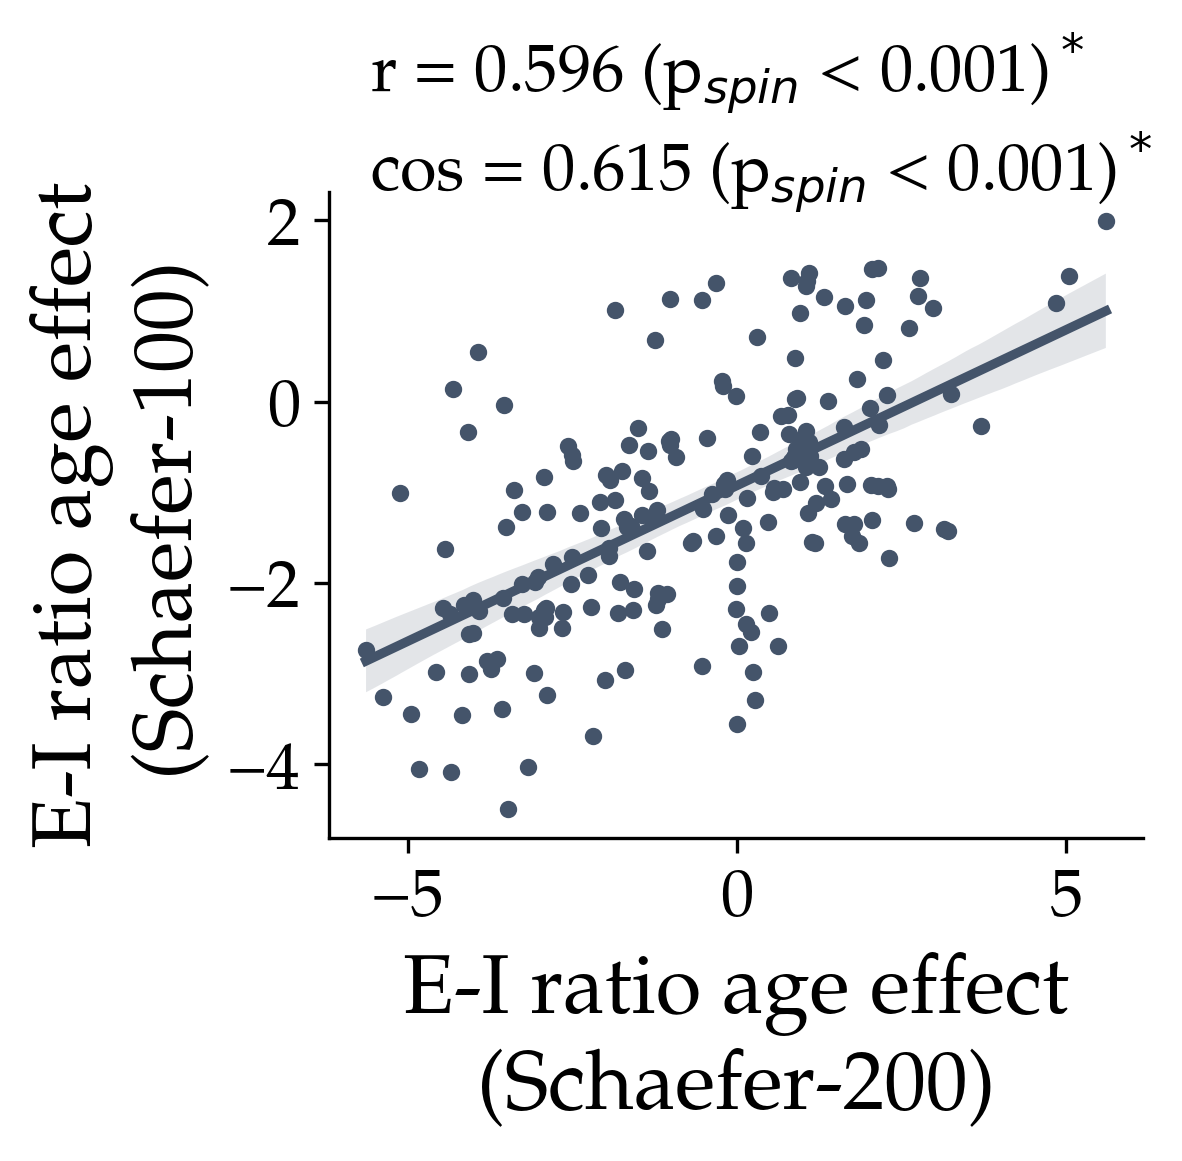

In [5]:
# project main age effect map from sch100->vertices->sch200
t_age_main_reparc_sch200 = transform.parcellate_surf(
    transform.deparcellate_surf(
        all_stats['main']['t'], 'schaefer-100'
    ), 'schaefer-200', concat=True).iloc[:, 0]
plot.reg_plot(
    all_stats['sch200'][['t']], t_age_main_reparc_sch200.to_frame(), 'schaefer-200',
    xlabel='E-I ratio age effect''\n(Schaefer-200)',
    ylabel='E-I ratio age effect''\n(Schaefer-100)'
)

## B. ICC

       younger    older      all
count  200.000  200.000  200.000
mean     0.347    0.333    0.356
std      0.206    0.209    0.186
min     -0.305   -0.229   -0.075
25%      0.228    0.186    0.232
50%      0.378    0.354    0.381
75%      0.486    0.472    0.486
max      0.832    0.883    0.836
T =0.9036492412292748, p = 0.3672740089646721


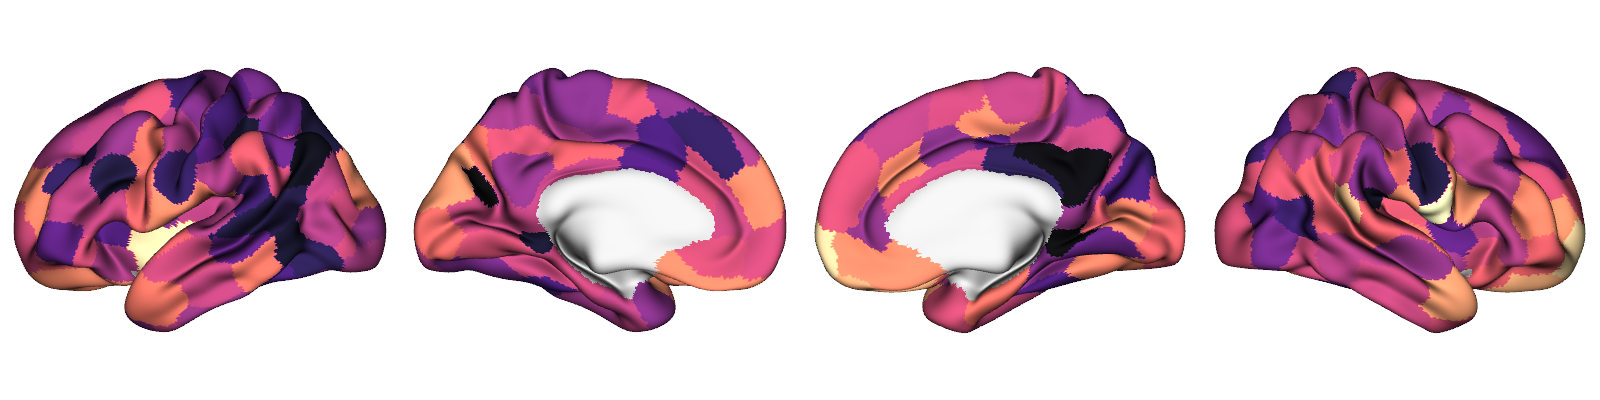

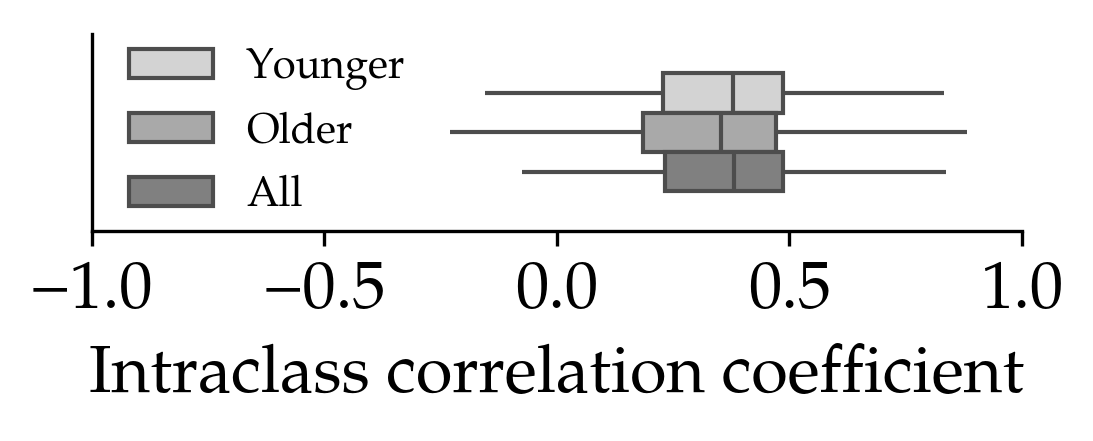

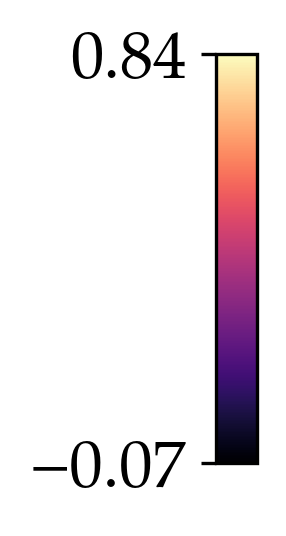

In [6]:
print(all_ICCs_by_age['sch200'].describe().round(3))
plot.plot_icc_by_age(all_ICCs_by_age['sch200'], 'schaefer-200')

## C. Comparison of GOF

In [8]:
gof_labels = {    
    'gof': 'Goodness-of-fit',
    'fc_corr': 'FC correlation',
    'sc_fc': 'SC-FC coupling',
    'fc_diff': 'FC difference',
    'fcd_ks': 'FCD KS distance',
}

Goodness-of-fit	-15.406	0.0	-0.054	0.05
FC correlation	-7.632	0.0	-0.022	0.04
SC-FC coupling	-25.835	0.0	-0.034	0.019
FC difference	2.405	0.017	0.006	0.034
FCD KS distance	16.434	0.0	0.027	0.023


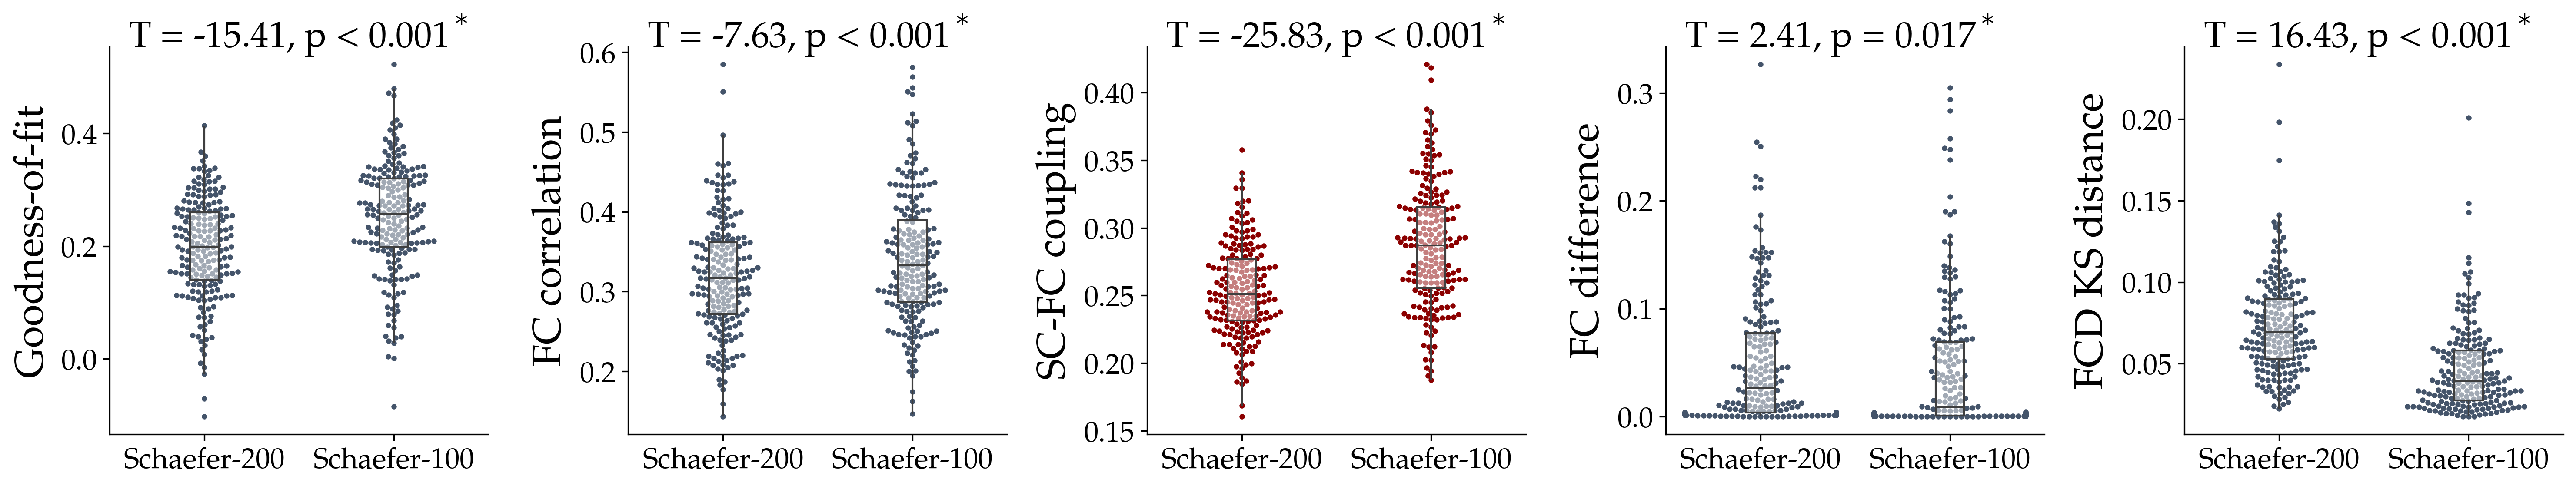

In [9]:
all_data['sch200']['Parcellation'] = 'Schaefer-200'
all_data['main']['Parcellation'] = 'Schaefer-100'
data_combined = pd.concat([all_data['sch200'], all_data['main']], axis=0)
gof_measures = ['gof','fc_corr', 'sc_fc', 'fc_diff', 'fcd_ks']
fig, axd = plt.subplot_mosaic(
    [
        gof_measures,
    ],
    gridspec_kw=dict(width_ratios=[1]*5, height_ratios=[1]), 
    figsize=(20, 4)
)

for i, col in enumerate(gof_measures):
    label = gof_labels[col]
    ax = axd[col]
    if col == 'sc_fc':
        color = 'darkred'
    else:
        color= '#44546A'
    sns.swarmplot(
        data=data_combined,
        x='Parcellation', y=col,
        s=3, color=color,
        ax=ax
    )
    sns.boxplot(
        data=data_combined,
        x='Parcellation', y=col,
        showfliers=False,
        showcaps=False, width=0.15,
        boxprops={"facecolor": (1, 1, 1, 0.5)},
        ax=ax)
    plt.setp(ax.collections, zorder=0, label="") # puts swarm in the back
    ax.set_ylabel(label, fontsize=22)
    ax.set_xlabel('')
    sns.despine()
    # add statistics
    alt = all_data['sch200'].loc[:, col]
    main = all_data['main'].loc[:, col]
    t, p = scipy.stats.ttest_rel(alt, main)
    if add_text:
        if p > 0.001:
            text = f'T = {t:.2f}, p = {p:.3f}'
        else:
            text = f'T = {t:.2f}, p < 0.001'
        if p < 0.05:
            text+=r'$^*$'
        text_x = ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.05
        text_y = ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*1
        ax.text(text_x, text_y, 
                text,
                color='black',
                size=20,
                multialignment='left')
    mean_diff = (alt - main).mean()
    sd_diff = (alt - main).std()
    print(label, round(t, 3), round(p,3), round(mean_diff,3), round(sd_diff,3), sep="\t")
fig.tight_layout(pad=1.0)